In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
data=pd.read_csv('d3.csv')

In [3]:
data

,x,y,class
0,2,4,1
1,4,2,1
2,4,4,0
3,4,6,1
4,6,2,0
5,6,4,1


In [4]:
x=np.array(data.iloc[:,0:2])
y=np.array(data.iloc[:,2])


In [5]:
p=np.array([6,6])###testing point

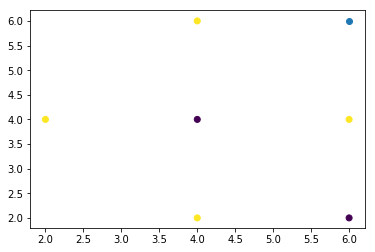

In [6]:
plt.scatter(p[0],p[1])
plt.scatter(data['x'],data['y'],c=data['class'])

In [15]:
points=np.zeros(shape=(6,4))

In [16]:
def dist(x,p):
    return np.sum(np.abs(x-p))  ##manhattan distance

In [17]:
for i in range(len(x)):
    d=dist(x[i],p)
    points[i,0:2]=x[i]
    points[i,2]=y[i]
    points[i,3]=d
    

In [18]:
distance=points
k=3   ##given 
    
    

In [19]:
distance=distance[distance[:,3].argsort()]

In [20]:
distance

array([[4., 6., 1., 2.],
       [6., 4., 1., 2.],
       [4., 4., 0., 4.],
       [6., 2., 0., 4.],
       [2., 4., 1., 6.],
       [4., 2., 1., 6.]])

In [21]:
distance=distance[0:k]

In [22]:
distance

array([[4., 6., 1., 2.],
       [6., 4., 1., 2.],
       [4., 4., 0., 4.]])

In [23]:
cnt1=0
cnt2=0
for i in range(len(distance)):
    if(distance[i,2]==1):
        cnt1=cnt1+1
    else:
        cnt2=cnt2+1
        

In [24]:

if(cnt1>cnt2):
    print("The point belongs to the first class")
    
else:
    print("The point belongs to the second class")
    
    


The point belongs to the first class


In [25]:
score1=0    ######first method of distane knn     ##weights inversely prop to square of distance
score2=0

for i in range(len(distance)):
    if(distance[i,2]==1):
        score1=score1+1/(distance[i,3]**2)
    else:
        score2=score2+1/(distance[i,3]**2)



In [26]:
print(score1,score2)

0.5 0.0625


In [27]:
if(score1>score2):  
    print("The point belongs to the first class")
    
else:
    print("The point belongs to the second class")
    

The point belongs to the first class


In [28]:
#######second method of  distance knn

c1=4 ##count of class 1 in dataset
c2=2  ## count of class 2 in dataset
c1=4/6
c2=2/6
print(c1,c2)
w1=1/c1
w2=1/c2
print(w1,w2)  ##weights inversely prop to count of class





0.6666666666666666 0.3333333333333333
1.5 3.0


In [29]:
score1=cnt1*w1
score2=cnt2*w2
print(score1,score2)
if(score1>score2):   ######second method of weighted knn
    print("The point belongs to the first class")
    
else:
    print("The point belongs to the second class")



3.0 3.0
The point belongs to the second class
